In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.drop(['id'], axis=1, inplace=True)

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

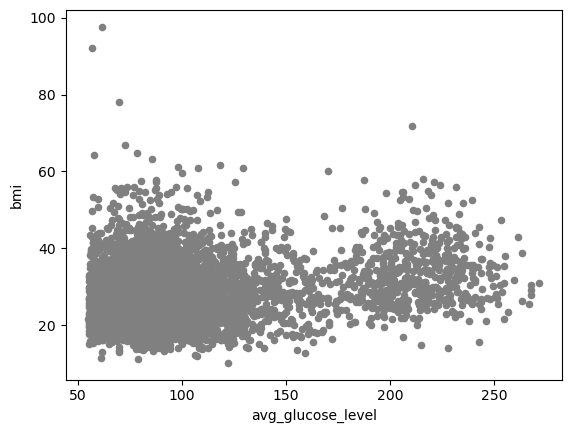

In [14]:
df.plot(x="avg_glucose_level", y="bmi", kind="scatter", c="gray")

In [15]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


In [11]:
df.rename(columns={'ever_married':'married',
                   'Residence_type':'res',
                   'work_type':'work',
                  'smoking_status':'smoking'}, inplace=True)

In [12]:
df.gender.groupby(df.gender).count()

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
df.smoking.groupby(df.smoking).count()

smoking
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: smoking, dtype: int64

In [14]:
df.stroke.groupby(df.stroke).count()

stroke
0    4861
1     249
Name: stroke, dtype: int64

In [15]:
gen_levels=[1,0]
gen_codes = ["Female","Male"]

In [16]:
df.gender = df.gender.replace(gen_codes,gen_levels)

In [17]:
df.drop(df.loc[df.gender=="Other"].index, inplace=True)

In [18]:
m_levels=[1,0]
m_codes = ["Yes","No"]

In [19]:
df.married = df.married.replace(m_codes,m_levels)

In [20]:
df.work.groupby(df.work).count()

work
Govt_job          657
Never_worked       22
Private          2924
Self-employed     819
children          687
Name: work, dtype: int64

In [21]:
work_codes=['Govt_job','Never_worked','Private','Self-employed','children']
work_levels = ['govt','never','private','self','children']
df.work.replace(work_codes,work_levels, inplace=True)

In [22]:
res_codes=['Urban','Rural']
res_levels=[1,0]
df.res.replace(res_codes, res_levels, inplace=True)

In [23]:
df.smoking.groupby(df.smoking).count()

smoking
Unknown            1544
formerly smoked     884
never smoked       1892
smokes              789
Name: smoking, dtype: int64

In [24]:
smoke_codes=['Unknown','formerly smoked','never smoked','smokes']
smoke_levels=['unknown','former','never','smokes']
df.smoking.replace(smoke_codes,smoke_levels, inplace=True)

In [25]:
df = pd.get_dummies(df,columns=['work','smoking'])

In [26]:
df.bmi.isna().sum()/len(df)

0.039342337052260715

In [27]:
df.bmi.fillna(df.bmi.mean(), inplace=True)
df.bmi.isna().sum()

0

In [32]:
df.head()

,gender,age,hypertension,heart_disease,married,res,avg_glucose_level,bmi,work_children,work_govt,work_never,work_private,work_self,smoking_former,smoking_never,smoking_smokes,smoking_unknown,stroke
0,0,67.0,0,1,1,1,228.69,36.60000,0,0,0,1,0,1,0,0,0,1
1,1,61.0,0,0,1,0,202.21,28.89456,0,0,0,0,1,0,1,0,0,1
2,0,80.0,0,1,1,0,105.92,32.50000,0,0,0,1,0,0,1,0,0,1
3,1,49.0,0,0,1,1,171.23,34.40000,0,0,0,1,0,0,0,1,0,1
4,1,79.0,1,0,1,0,174.12,24.00000,0,0,0,0,1,0,1,0,0,1


In [31]:
col = df.pop('stroke')
df.insert(len(df.columns),col.name,col)

In [47]:
#Additional Functions/Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
X = df.iloc[:,:-1]
y = df.stroke

In [35]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=104,
                                                   test_size = 0.20,
                                                   shuffle=True)

In [36]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=104,
                                                test_size=0.50,
                                                shuffle=True)

In [37]:
print(len(X_train), len(X_test), len(X_val))

4087 511 511


In [38]:
neigh = KNeighborsClassifier(n_neighbors=4)

In [39]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred = neigh.predict(X_test.values)

C:\Users\rrkel\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [41]:
accuracy_score(y_test, y_pred)

0.9628180039138943

In [45]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

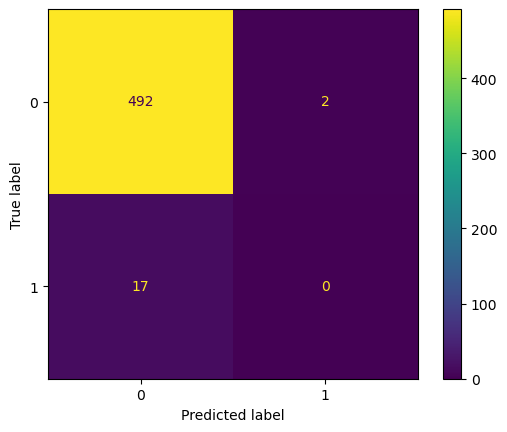

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()


-494

In [281]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler